In [91]:
import pandas as pd
# Colab环境下配置Matplotlib以支持中文显示
! pip install mplfonts
import matplotlib.pyplot as plt
from mplfonts.bin.cli import init
# init() # Colab首次运行时请解除注释 之后请加上注释
from mplfonts import use_font
use_font('Noto Serif CJK SC')#指定中文字体

# 读取数据
data = pd.read_excel("merged_df.xlsx")

In [92]:
# 根据提供的描述重新归类列名

# 发病相关特征
onset_related_cols = ['血压_最大值', '血压_最小值']  # 这里假设收缩压为最大值，舒张压为最小值

# 治疗相关特征
treatment_related_cols = [
    '脑室引流', '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经'
]

# 影像相关特征
# 体积及位置
volume_and_location_cols = [col for col in data.columns if any(sub in col for sub in ['Hemo', 'ED', 'ACA_L', 'ACA_R', 'MCA_L', 'MCA_R', 'PCA_L', 'PCA_R', 'Pons_Medulla_L', 'Pons_Medulla_R', 'Cerebellum_L', 'Cerebellum_R'])]
# 形状及灰度分布
shape_and_gray_distribution_cols = [col for col in data.columns if 'NCCT' in col and col not in volume_and_location_cols]

In [93]:
df=pd.DataFrame()

1.0


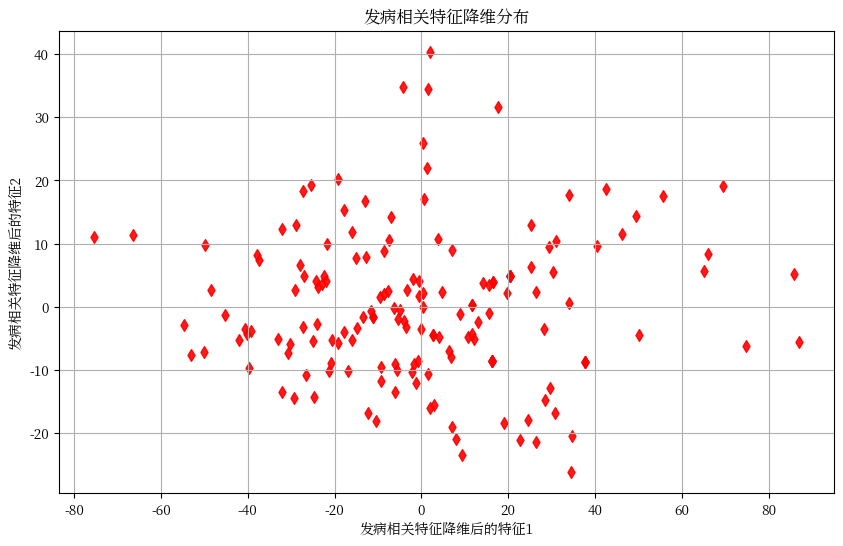

In [94]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. 发病相关特征
onset_data = data[onset_related_cols].fillna(0)
pca = PCA(n_components=2)
newX = pca.fit_transform(onset_data)
print(pca.explained_variance_ratio_.sum())  #输出贡献率
    # 可视化
plt.figure(figsize=(10, 6))
plt.scatter(newX[:, 0], newX[:, 1], color='red',alpha=0.9,marker='d')
plt.xlabel('发病相关特征降维后的特征1')
plt.ylabel('发病相关特征降维后的特征2')
plt.title('发病相关特征降维分布')

plt.grid(True)
plt.show()

for i in range(2):
    df['发病相关特征_%d'%i]=newX[:, i]


0.9096811134463106


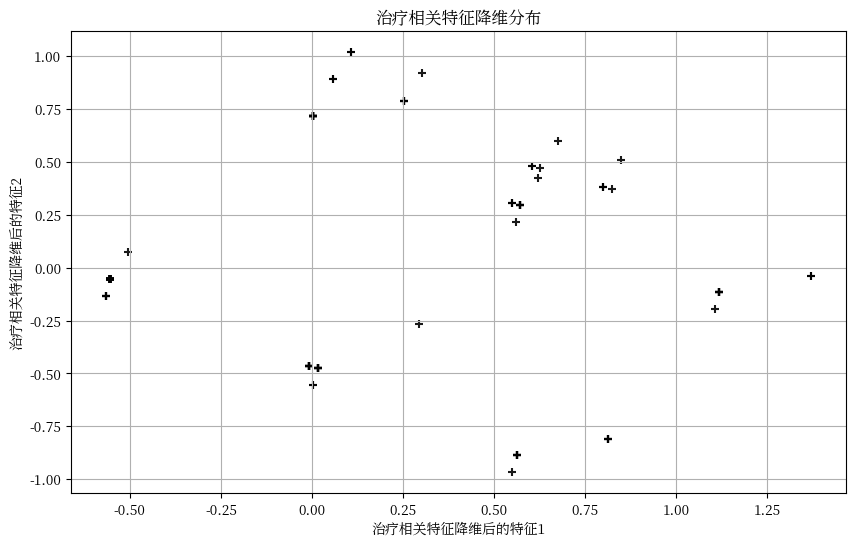

In [95]:

# 2. 治疗相关特征

treatment_data = data[treatment_related_cols].fillna(0)
pca = PCA(n_components=5)
newX = pca.fit_transform(treatment_data)
print(pca.explained_variance_ratio_.sum())  #输出贡献率
    # 可视化
plt.figure(figsize=(10, 6))
plt.scatter(newX[:, 0], newX[:, 1], color='black',alpha=0.9,marker='+')
plt.xlabel('治疗相关特征降维后的特征1')
plt.ylabel('治疗相关特征降维后的特征2')
plt.title('治疗相关特征降维分布')

plt.grid(True)
plt.show()

for i in range(5):
    df['治疗相关特征_%d'%i]=newX[:, i]

0.936422638768479


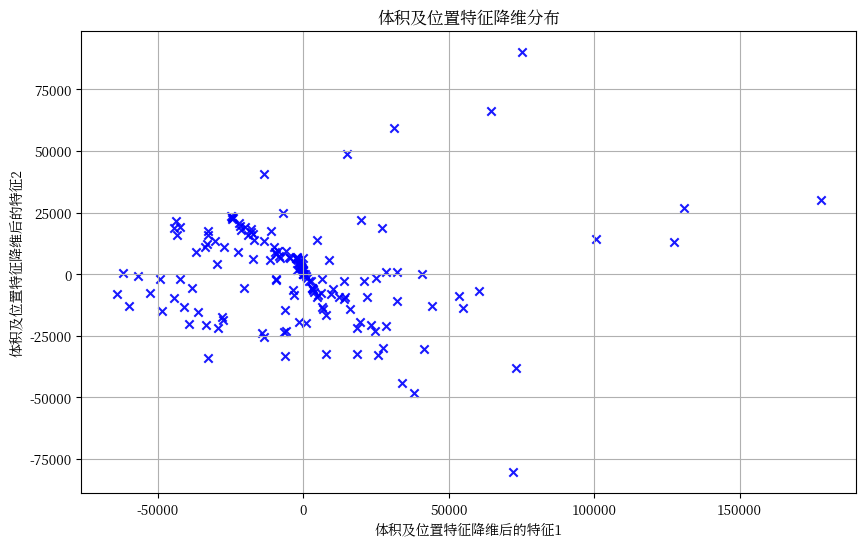

In [96]:

# 3. 影像相关特征（体积及位置）
volume_location_data = data[volume_and_location_cols].fillna(0)
pca = PCA(n_components=5)
newX = pca.fit_transform(volume_location_data)
print(pca.explained_variance_ratio_.sum())  #输出贡献率
    # 可视化
plt.figure(figsize=(10, 6))
plt.scatter(newX[:, 0], newX[:, 1], color='blue',alpha=0.9,marker='x')
plt.xlabel('体积及位置特征降维后的特征1')
plt.ylabel('体积及位置特征降维后的特征2')
plt.title('体积及位置特征降维分布')
plt.grid(True)
plt.show()

for i in range(5):
    df['影像相关特征（体积及位置）_%d'%i]=newX[:, i]



0.9999999999994407


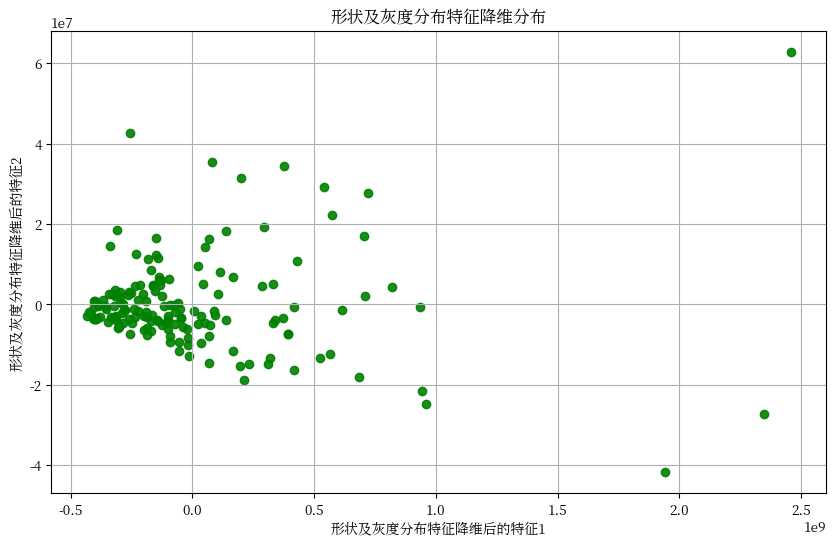

In [97]:
# 4. 影像相关特征（形状及灰度分布）
shape_gray_data = data[shape_and_gray_distribution_cols].fillna(0)
pca = PCA(n_components=2)
newX = pca.fit_transform(shape_gray_data)
print(pca.explained_variance_ratio_.sum())  #输出贡献率
    # 可视化
plt.figure(figsize=(10, 6))
plt.scatter(newX[:, 0], newX[:, 1], color='green',alpha=0.9)
plt.xlabel('形状及灰度分布特征降维后的特征1')
plt.ylabel('形状及灰度分布特征降维后的特征2')
plt.title('形状及灰度分布特征降维分布')

plt.grid(True)
plt.show()

for i in range(2):
    df['影像相关特征（形状及灰度分布）_%d'%i]=newX[:, i]

In [98]:
df['90天mRS']=data['90天mRS']

<Axes: >

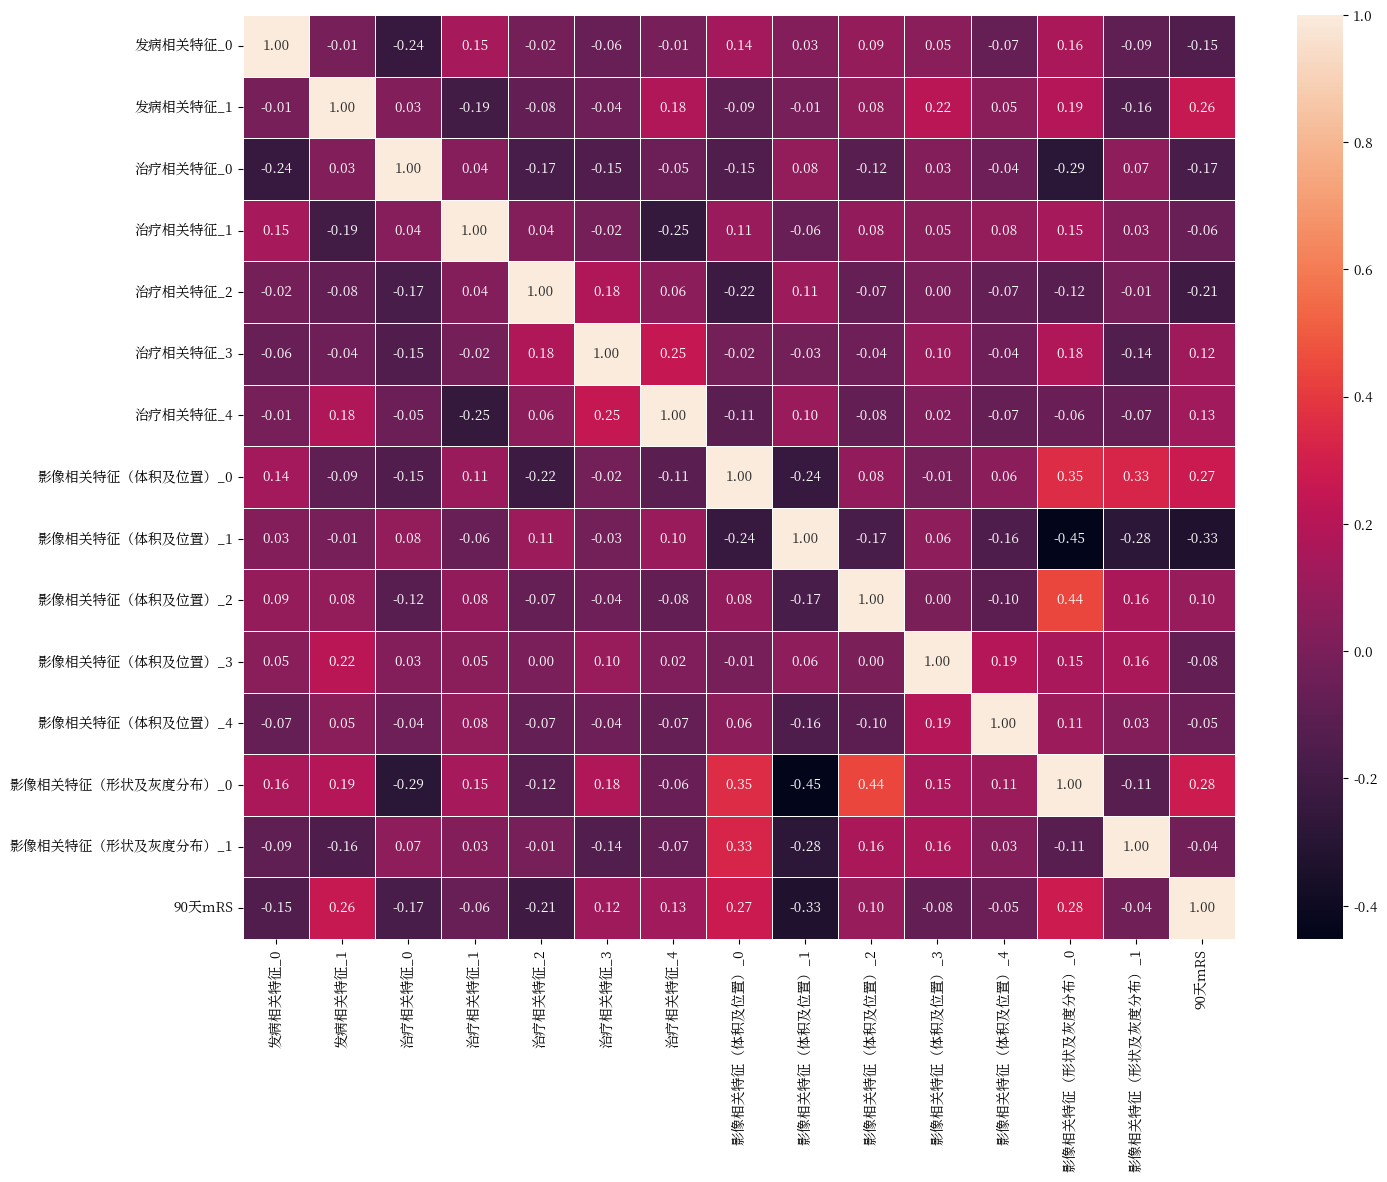

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns

spearman_corr = df.corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", linewidths=0.5)
# plt.savefig('./斯皮尔曼相关性矩阵热力图df.jpg')